In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [3]:
# read csv file
crime_data=pd.read_csv("crime_data.csv")
# convert csv file to dataframe
crime_data_df=pd.DataFrame(crime_data)
crime_data_df.count()


DR_NO             712814
Date Rptd         712814
DATE OCC          712814
TIME OCC          712814
AREA              712814
AREA NAME         712814
Rpt Dist No       712814
Part 1-2          712814
Crm Cd            712814
Crm Cd Desc       712814
Mocodes           614949
Vict Age          712814
Vict Sex          619589
Vict Descent      619583
Premis Cd         712806
Premis Desc       712423
Weapon Used Cd    247593
Weapon Desc       247593
Status            712814
Status Desc       712814
Crm Cd 1          712806
Crm Cd 2           53019
Crm Cd 3            1780
Crm Cd 4              54
LOCATION          712814
Cross Street      115280
LAT               712814
LON               712814
dtype: int64

In [4]:
# convert "DATE OCC" date to datetime format
crime_data_df['DATE OCC'] = pd.to_datetime(crime_data_df['DATE OCC'])
crime_data_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712809,230804266,01/08/2023 12:00:00 AM,2023-01-08,1030,8,West LA,839,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,10200 SANTA MONICA BL,NaN,34.0611,-118.4184
712810,231604807,01/27/2023 12:00:00 AM,2023-01-26,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
712811,231606525,03/22/2023 12:00:00 AM,2023-03-22,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
712812,231210064,04/12/2023 12:00:00 AM,2023-04-12,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915


In [5]:
# remove unecessary columns: DR_NO, AREA, Rpt Dist No, Part 1-2, Crm Cd, Mocodes, Vict Sex, Vict Descent, Premis Cd, Weapon Used Cd, Status, Status Desc, Crm Cd 1, Crm Cd 2, Crm Cd 3, Crm Cd 4, Cross Street
red_crime_data_df=crime_data_df.loc[:,['Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc','Vict Age','Premis Desc','Weapon Desc', 'LOCATION', 'LAT','LON']]
red_crime_data_df.head(5)
  

,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Premis Desc,Weapon Desc,LOCATION,LAT,LON
0,01/08/2020 12:00:00 AM,2020-01-08,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978
1,01/02/2020 12:00:00 AM,2020-01-01,330,Central,BATTERY - SIMPLE ASSAULT,25,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545
2,04/14/2020 12:00:00 AM,2020-02-13,1200,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,POLICE FACILITY,NaN,200 E 6TH ST,34.0448,-118.2474
3,01/01/2020 12:00:00 AM,2020-01-01,1730,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,5400 CORTEEN PL,34.1685,-118.4019
4,01/01/2020 12:00:00 AM,2020-01-01,415,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,BEAUTY SUPPLY STORE,NaN,14400 TITUS ST,34.2198,-118.4468


In [6]:
# extract data only relating to my assigned region: hollywood
hollywood_data=red_crime_data_df[(red_crime_data_df["AREA NAME"] == "Hollywood") | (red_crime_data_df["AREA NAME"] == "N Hollywood")]
hollywood_data.head()



,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Premis Desc,Weapon Desc,LOCATION,LAT,LON
3,01/01/2020 12:00:00 AM,2020-01-01,1730,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,5400 CORTEEN PL,34.1685,-118.4019
105,04/15/2020 12:00:00 AM,2020-04-12,1300,Hollywood,VEHICLE - STOLEN,0,PARKING LOT,NaN,5700 HOLLYWOOD BL,34.1017,-118.3136
215,12/08/2020 12:00:00 AM,2020-11-30,1100,Hollywood,CHILD STEALING,0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,900 N SERRANO AV,34.0862,-118.3064
289,01/05/2020 12:00:00 AM,2020-01-05,1900,Hollywood,DOCUMENT FORGERY / STOLEN FELONY,0,STREET,NaN,6500 YUCCA ST,34.1039,-118.3318
291,05/11/2020 12:00:00 AM,2020-05-11,1130,Hollywood,ROBBERY,0,MINI-MART,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",7000 W SUNSET BL,34.0980,-118.3416


In [7]:
# identify top 5 crime types

# Group the DataFrame by 'Crm Cd Desc' and count the occurrences
hollywood_topcrimes = hollywood_data.groupby('Crm Cd Desc').size()

# Get the top 5 crimes based on the occurrence count
hollywood_total_top5 = hollywood_topcrimes.nlargest(5)
hollywood_total_top5

Crm Cd Desc
VEHICLE - STOLEN                                           6077
BATTERY - SIMPLE ASSAULT                                   5955
BURGLARY FROM VEHICLE                                      5820
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    4980
BURGLARY                                                   4801
dtype: int64

In [8]:
# creating a dataframe sorted by the year 2020
hollywood_data["year"] = np.nan
hollywood_data["month"]=np.nan

hollywood_data["year"]= hollywood_data["DATE OCC"].dt.year
hollywood_data_2020 = pd.DataFrame(hollywood_data.loc[hollywood_data["year"] == 2020, :])
hollywood_data_2020["month"]= hollywood_data_2020["DATE OCC"].dt.month
hollywood_data_2020



/var/folders/yt/g_rv4vld7rx6vly6q8681wr80000gn/T/ipykernel_2544/165398478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hollywood_data["year"] = np.nan
/var/folders/yt/g_rv4vld7rx6vly6q8681wr80000gn/T/ipykernel_2544/165398478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hollywood_data["month"]=np.nan
/var/folders/yt/g_rv4vld7rx6vly6q8681wr80000gn/T/ipykernel_2544/165398478.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Premis Desc,Weapon Desc,LOCATION,LAT,LON,year,month
3,01/01/2020 12:00:00 AM,2020-01-01,1730,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,5400 CORTEEN PL,34.1685,-118.4019,2020,1
105,04/15/2020 12:00:00 AM,2020-04-12,1300,Hollywood,VEHICLE - STOLEN,0,PARKING LOT,NaN,5700 HOLLYWOOD BL,34.1017,-118.3136,2020,4
215,12/08/2020 12:00:00 AM,2020-11-30,1100,Hollywood,CHILD STEALING,0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,900 N SERRANO AV,34.0862,-118.3064,2020,11
289,01/05/2020 12:00:00 AM,2020-01-05,1900,Hollywood,DOCUMENT FORGERY / STOLEN FELONY,0,STREET,NaN,6500 YUCCA ST,34.1039,-118.3318,2020,1
291,05/11/2020 12:00:00 AM,2020-05-11,1130,Hollywood,ROBBERY,0,MINI-MART,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",7000 W SUNSET BL,34.0980,-118.3416,2020,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199108,04/20/2023 12:00:00 AM,2020-06-26,1200,N Hollywood,THEFT OF IDENTITY,0,CAR WASH,NaN,10500 MAGNOLIA BL,34.1695,-118.3659,2020,6
199118,09/27/2020 12:00:00 AM,2020-09-27,650,Hollywood,ROBBERY,27,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",KITCHEN KNIFE,1100 N BEACHWOOD DR,34.0908,-118.3212,2020,9
199126,10/03/2020 12:00:00 AM,2020-10-03,2020,Hollywood,ROBBERY,27,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",STUN GUN,800 WILCOX AV,34.0853,-118.3310,2020,10
199129,04/05/2023 12:00:00 AM,2020-09-01,1600,Hollywood,"RAPE, FORCIBLE",28,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1300 N ORANGE DR,34.0943,-118.3415,2020,9


In [9]:
# creating a dataframe sorted by the year 2021
hollywood_data_2021 = pd.DataFrame(hollywood_data.loc[hollywood_data["year"] == 2021, :])
hollywood_data_2021["month"]= hollywood_data_2021["DATE OCC"].dt.month
hollywood_data_2021


,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Premis Desc,Weapon Desc,LOCATION,LAT,LON,year,month
199153,08/17/2021 12:00:00 AM,2021-07-13,1525,Hollywood,THEFT PLAIN - PETTY ($950 & UNDER),49,SINGLE FAMILY DWELLING,NaN,1700 N SYCAMORE AV,34.1015,-118.3434,2021,7
199172,06/24/2021 12:00:00 AM,2021-06-24,235,Hollywood,ROBBERY,40,STREET,HAND GUN,IVAR,34.0998,-118.3288,2021,6
199188,07/04/2021 12:00:00 AM,2021-07-03,1200,N Hollywood,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",61,SINGLE FAMILY DWELLING,NaN,4100 KLUMP AV,34.1432,-118.3757,2021,7
199199,07/23/2021 12:00:00 AM,2021-07-23,2145,Hollywood,BATTERY - SIMPLE ASSAULT,22,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",6900 LOS TILOS RD,34.1091,-118.3431,2021,7
199204,09/26/2021 12:00:00 AM,2021-09-21,1400,Hollywood,VEHICLE - STOLEN,0,STREET,NaN,1400 N BRONSON AV,34.0958,-118.3180,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408080,06/20/2021 12:00:00 AM,2021-06-16,120,N Hollywood,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",23,STREET,NaN,10900 BLUFFSIDE DR,34.1412,-118.3681,2021,6
408096,01/15/2021 12:00:00 AM,2021-01-14,1730,N Hollywood,BURGLARY FROM VEHICLE,41,SINGLE FAMILY DWELLING,NaN,5000 LAUREL CANYON BL,34.1613,-118.3965,2021,1
408100,06/20/2021 12:00:00 AM,2021-06-20,1110,N Hollywood,THEFT PLAIN - PETTY ($950 & UNDER),31,MARKET,NaN,6100 LANKERSHIM BL,34.1817,-118.3848,2021,6
408119,09/29/2021 12:00:00 AM,2021-09-29,2200,N Hollywood,INTIMATE PARTNER - SIMPLE ASSAULT,36,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",6400 TROOST AV,34.1867,-118.3865,2021,9


In [10]:
# creating a dataframe sorted by the year 2022
hollywood_data_2022 = pd.DataFrame(hollywood_data.loc[hollywood_data["year"] == 2022, :])
hollywood_data_2022["month"]= hollywood_data_2022["DATE OCC"].dt.month
hollywood_data_2022

,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Premis Desc,Weapon Desc,LOCATION,LAT,LON,year,month
408145,04/10/2022 12:00:00 AM,2022-04-10,650,N Hollywood,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",41,STREET,NaN,10600 BURBANK BL,34.1758,-118.3643,2022,4
408148,06/23/2022 12:00:00 AM,2022-03-03,1930,Hollywood,BURGLARY FROM VEHICLE,22,PARKING LOT,NaN,WILCOX,34.0998,-118.3310,2022,3
408150,07/17/2022 12:00:00 AM,2022-07-17,1415,Hollywood,BATTERY - SIMPLE ASSAULT,52,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",5600 FERNWOOD AV,34.0958,-118.3110,2022,7
408158,08/05/2022 12:00:00 AM,2022-07-23,1,Hollywood,SEXUAL PENETRATION W/FOREIGN OBJECT,26,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1500 VINE ST,34.0980,-118.3266,2022,7
408162,10/28/2022 12:00:00 AM,2022-10-14,1500,N Hollywood,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",49,OTHER BUSINESS,NaN,7300 ATOLL AV,34.2032,-118.4211,2022,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
641091,03/23/2022 12:00:00 AM,2022-03-22,1300,Hollywood,BRANDISH WEAPON,18,STREET,HAND GUN,1700 QUEENS CT,34.1009,-118.3777,2022,3
641112,12/08/2022 12:00:00 AM,2022-12-08,955,Hollywood,THEFT OF IDENTITY,28,AUTOMATED TELLER MACHINE (ATM),NaN,1800 GARFIELD PL,34.1036,-118.3108,2022,12
641113,03/31/2022 12:00:00 AM,2022-03-30,1800,N Hollywood,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",49,STREET,NaN,6700 CLEON AV,34.1921,-118.3682,2022,3
641120,06/25/2022 12:00:00 AM,2022-06-25,100,Hollywood,BRANDISH WEAPON,30,STREET,VERBAL THREAT,HIGHLAND,34.0969,-118.3386,2022,6


In [11]:
# creating a dataframe sorted by the year 2023
hollywood_data_2023 = pd.DataFrame(hollywood_data.loc[hollywood_data["year"] == 2023, :])
hollywood_data_2023["month"]= hollywood_data_2023["DATE OCC"].dt.month
hollywood_data_2023

,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Premis Desc,Weapon Desc,LOCATION,LAT,LON,year,month
641143,04/06/2023 12:00:00 AM,2023-04-06,1700,Hollywood,INTIMATE PARTNER - SIMPLE ASSAULT,43,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1400 N ALTA VISTA BL,34.0964,-118.3471,2023,4
641156,04/24/2023 12:00:00 AM,2023-04-24,930,N Hollywood,ROBBERY,28,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",5600 ELMER AV,34.1722,-118.3763,2023,4
641158,04/09/2023 12:00:00 AM,2023-04-08,2300,N Hollywood,VEHICLE - STOLEN,0,STREET,NaN,6700 ENSIGN AV,34.1921,-118.3714,2023,4
641161,01/15/2023 12:00:00 AM,2023-01-06,230,Hollywood,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",40,SINGLE FAMILY DWELLING,NaN,1000 N OXFORD AV,34.0885,-118.3078,2023,1
641164,02/25/2023 12:00:00 AM,2023-02-24,1740,N Hollywood,BURGLARY,40,DRUG STORE,NaN,10800 VANOWEN ST,34.1940,-118.3660,2023,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
712716,01/29/2023 12:00:00 AM,2023-01-29,2050,N Hollywood,BATTERY - SIMPLE ASSAULT,60,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",11600 HUSTON ST,34.1595,-118.3856,2023,1
712725,04/23/2023 12:00:00 AM,2023-04-17,600,N Hollywood,DOCUMENT FORGERY / STOLEN FELONY,80,SINGLE FAMILY DWELLING,NaN,4400 SANCOLA AV,34.1504,-118.3538,2023,4
712726,01/03/2023 12:00:00 AM,2023-01-03,800,Hollywood,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",48,PARKING UNDERGROUND/BUILDING,NaN,8000 W SUNSET BL,34.0980,-118.3651,2023,1
712745,03/06/2023 12:00:00 AM,2023-02-25,35,N Hollywood,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",47,OTHER PREMISE,NaN,11600 VALERIO ST,34.2048,-118.3845,2023,2


In [12]:
# create dataframe for top 5 crimes in 2020
# Group the DataFrame by 'Crm Cd Desc' and count the occurrences
crime_counts_2020 = hollywood_data_2020.groupby('Crm Cd Desc').size()

# Get the top 5 crimes based on the occurrence count
top5_2020crimes = crime_counts_2020.nlargest(5)
top5_2020crimes


Crm Cd Desc
VEHICLE - STOLEN                                           1701
BATTERY - SIMPLE ASSAULT                                   1628
BURGLARY FROM VEHICLE                                      1509
BURGLARY                                                   1414
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    1406
dtype: int64

In [13]:
# create dataframe for top 5 crimes in 2021
# Group the DataFrame by 'Crm Cd Desc' and count the occurrences
crime_counts_2021 = hollywood_data_2021.groupby('Crm Cd Desc').size()

# Get the top 5 crimes based on the occurrence count
top5_2021crimes = crime_counts_2021.nlargest(5)
top5_2021crimes


Crm Cd Desc
BURGLARY FROM VEHICLE                                      1976
VEHICLE - STOLEN                                           1923
BATTERY - SIMPLE ASSAULT                                   1801
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    1553
THEFT PLAIN - PETTY ($950 & UNDER)                         1541
dtype: int64

In [14]:
# create dataframe for top 5 crimes in 2022
# Group the DataFrame by 'Crm Cd Desc' and count the occurrences
crime_counts_2022 = hollywood_data_2022.groupby('Crm Cd Desc').size()

# Get the top 5 crimes based on the occurrence count
top5_2022crimes = crime_counts_2022.nlargest(5)
top5_2022crimes

Crm Cd Desc
BATTERY - SIMPLE ASSAULT                                   1942
VEHICLE - STOLEN                                           1903
BURGLARY FROM VEHICLE                                      1860
THEFT OF IDENTITY                                          1709
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    1557
dtype: int64

In [15]:
# create dataframe for top 5 crimes in 2023
# Group the DataFrame by 'Crm Cd Desc' and count the occurrences
crime_counts_2023 = hollywood_data_2023.groupby('Crm Cd Desc').size()

# Get the top 5 crimes based on the occurrence count
top5_2023crimes = crime_counts_2023.nlargest(5)
top5_2023crimes

Crm Cd Desc
BATTERY - SIMPLE ASSAULT                                   584
VEHICLE - STOLEN                                           550
BURGLARY                                                   479
BURGLARY FROM VEHICLE                                      475
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    464
dtype: int64

Top 5 Crimes vs Years:
                                                    2020  2021  2022
VEHICLE - STOLEN                                    1701  1923  1903
BATTERY - SIMPLE ASSAULT                            1628  1801  1942
BURGLARY FROM VEHICLE                               1509  1976  1860
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...  1406  1553  1557
BURGLARY                                            1414  1400  1508




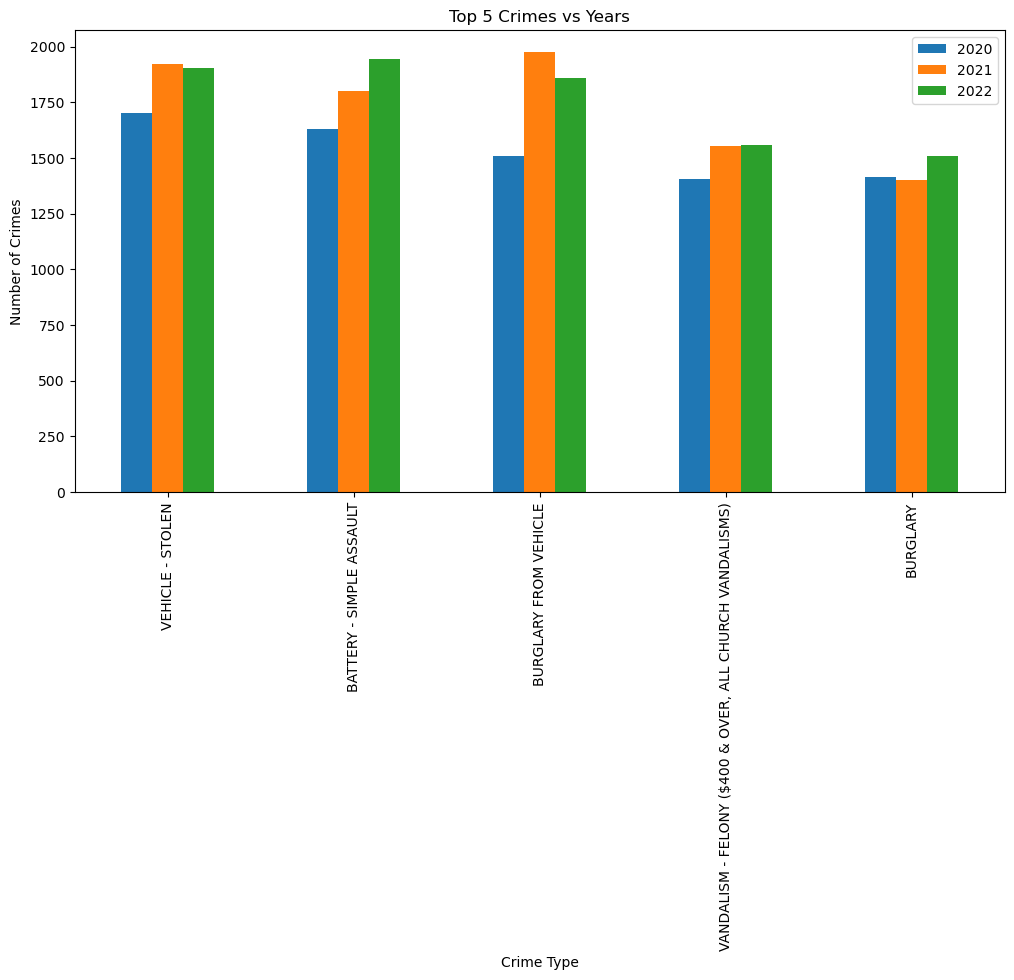

In [16]:
# 2. Top 5 crimes vs years (Bar Chart)
top_5_crimes_overall = hollywood_data["Crm Cd Desc"].value_counts().head(5).index.tolist()
# Create a DataFrame for each year
years = [2020, 2021, 2022]
data_by_year = {year: hollywood_data[hollywood_data["DATE OCC"].dt.year == year] for year in years}

# Calculate the number of top 5 crimes by year
crime_counts_by_year = {}
for year, crimes in data_by_year.items():
    crime_counts_by_year[year] = crimes["Crm Cd Desc"].value_counts().loc[top_5_crimes_overall]

# Print the table for the bar chart
print("Top 5 Crimes vs Years:")
print(pd.DataFrame(crime_counts_by_year))
print("\n")

# Plot the bar chart
yearly_crime_counts_df = pd.DataFrame(crime_counts_by_year)
yearly_crime_counts_df.plot(kind="bar", figsize=(12, 6))
plt.title("Top 5 Crimes vs Years")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.show()


Top 3 Crimes During Socioeconomic Events:
                          Pre-COVID  During COVID  Post-COVID  \
VEHICLE - STOLEN                207          3417        2453   
BATTERY - SIMPLE ASSAULT        317          3112        2526   
BURGLARY FROM VEHICLE           328          3157        2335   

                          During Inflation  Post-Inflation  
VEHICLE - STOLEN                      1903             550  
BATTERY - SIMPLE ASSAULT              1942             584  
BURGLARY FROM VEHICLE                 1860             475  




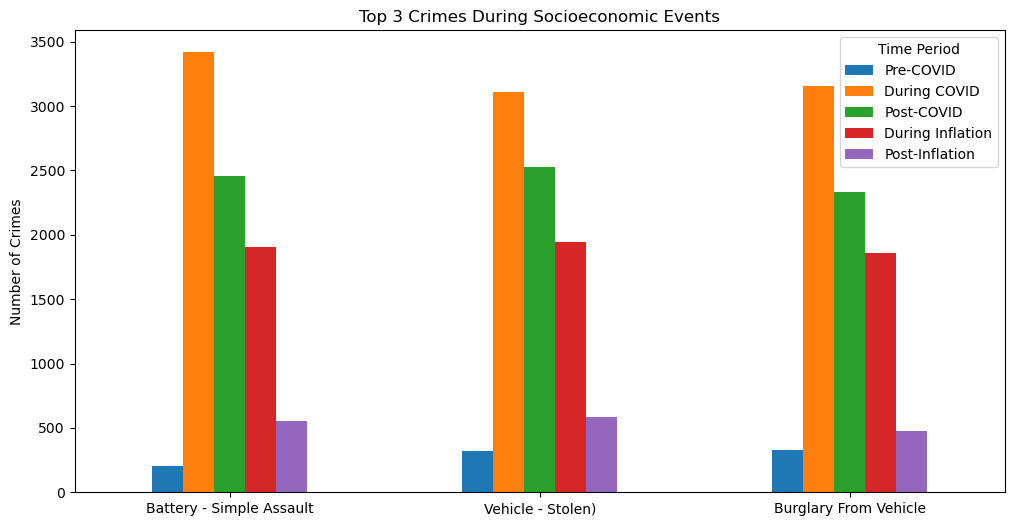

In [17]:
top_3_crimes = top_5_crimes_overall[:3]

pre_covid_period = (hollywood_data["DATE OCC"] < "2020-03-01")
during_covid_period = (hollywood_data["DATE OCC"] >= "2020-03-01") & (hollywood_data["DATE OCC"] <= "2021-12-31")
post_covid_period = (hollywood_data["DATE OCC"] > "2021-12-31")

# Adjust the inflation periods if needed
during_inflation_period = (hollywood_data["DATE OCC"] >= "2022-01-01") & (hollywood_data["DATE OCC"] <= "2022-12-31")
post_inflation_period = (hollywood_data["DATE OCC"] > "2022-12-31")

pre_covid_crime_counts = hollywood_data[pre_covid_period]["Crm Cd Desc"].value_counts().loc[top_3_crimes]
during_covid_crime_counts = hollywood_data[during_covid_period]["Crm Cd Desc"].value_counts().loc[top_3_crimes]
post_covid_crime_counts = hollywood_data[post_covid_period]["Crm Cd Desc"].value_counts().loc[top_3_crimes]

during_inflation_crime_counts = hollywood_data[during_inflation_period]["Crm Cd Desc"].value_counts().loc[top_3_crimes]
post_inflation_crime_counts = hollywood_data[post_inflation_period]["Crm Cd Desc"].value_counts().loc[top_3_crimes]


crime_counts_by_period = pd.DataFrame({
    "Pre-COVID": pre_covid_crime_counts,
    "During COVID": during_covid_crime_counts,
    "Post-COVID": post_covid_crime_counts,
    "During Inflation": during_inflation_crime_counts,
    "Post-Inflation": post_inflation_crime_counts
})


# Print the table for the bar chart
print("Top 3 Crimes During Socioeconomic Events:")
print(crime_counts_by_period)
print("\n")


ax = crime_counts_by_period.plot.bar(rot=0, figsize=(12, 6))
ax.set_ylabel("Number of Crimes")
ax.set_title("Top 3 Crimes During Socioeconomic Events")
plt.xticks(range(len(top_3_crimes)), top_3_crimes)
plt.legend(title="Time Period")

x_tick_labels = {'Vehicle - Stolen)','Battery - Simple Assault','Burglary From Vehicle'}
plt.gca().set_xticklabels(x_tick_labels)

#save figure to PNG 
plt.savefig("Top3_socialeconomic.png",bbox_inches='tight')
plt.show()

/var/folders/yt/g_rv4vld7rx6vly6q8681wr80000gn/T/ipykernel_2544/3182891840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_crimes_data["year"]=np.nan
/var/folders/yt/g_rv4vld7rx6vly6q8681wr80000gn/T/ipykernel_2544/3182891840.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_crimes_data["year"]= top_5_crimes_data["DATE OCC"].dt.year


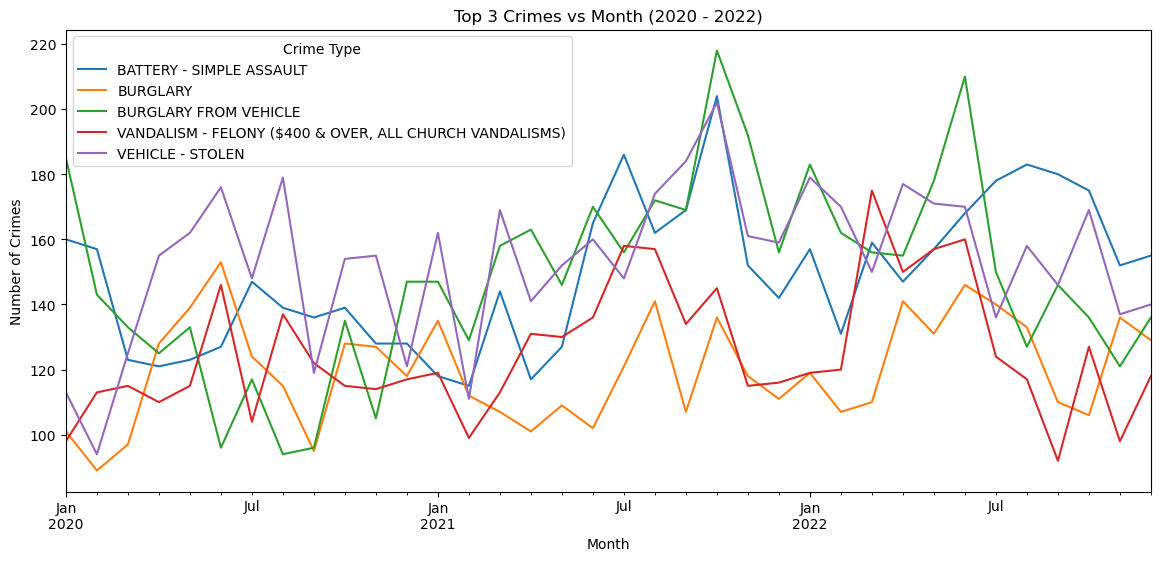

In [18]:
# Top 3 crimes vs month (Line chart)
top_5_crimes_overall = hollywood_data["Crm Cd Desc"].value_counts().head(5).index.tolist()
top_5_crimes_data = hollywood_data[hollywood_data["Crm Cd Desc"].isin(top_5_crimes_overall)]

top_5_crimes_data["year"]=np.nan
top_5_crimes_data["year"]= top_5_crimes_data["DATE OCC"].dt.year

top_5_crimes_data_year = pd.DataFrame(top_5_crimes_data.loc[top_5_crimes_data["year"] != 2023, :])
top_5_crimes_data_year

crimes_by_month = top_5_crimes_data_year.groupby([top_5_crimes_data["DATE OCC"].dt.to_period("M"), "Crm Cd Desc"]).size().unstack().fillna(0)

# Plot the line chart
fig, ax = plt.subplots(figsize=(14, 6))
crimes_by_month.plot(ax=ax)
plt.title("Top 3 Crimes vs Month (2020 - 2022)")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.legend(title="Crime Type")
plt.show()

In [19]:

top5_dataframe=hollywood_data[(hollywood_data["Crm Cd Desc"] == "VEHICLE - STOLEN") | (hollywood_data["Crm Cd Desc"] == "BATTERY - SIMPLE ASSAULT") | (hollywood_data["Crm Cd Desc"] == "BURGLARY FROM VEHICLE") | (hollywood_data["Crm Cd Desc"] == "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)") | (hollywood_data["Crm Cd Desc"] == "BURGLARY")]
top5_dataframe


,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Premis Desc,Weapon Desc,LOCATION,LAT,LON,year,month
105,04/15/2020 12:00:00 AM,2020-04-12,1300,Hollywood,VEHICLE - STOLEN,0,PARKING LOT,NaN,5700 HOLLYWOOD BL,34.1017,-118.3136,2020,NaN
356,09/28/2020 12:00:00 AM,2020-09-27,35,Hollywood,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,OTHER BUSINESS,NaN,6600 W SUNSET BL,34.0980,-118.3335,2020,NaN
433,05/10/2020 12:00:00 AM,2020-05-10,1745,Hollywood,BURGLARY FROM VEHICLE,22,STREET,NaN,SUNSET,34.0980,-118.3316,2020,NaN
549,11/20/2020 12:00:00 AM,2020-11-19,2030,Hollywood,VEHICLE - STOLEN,0,STREET,NaN,1600 N LA BREA AV,34.1007,-118.3494,2020,NaN
833,08/06/2020 12:00:00 AM,2020-08-06,2300,Hollywood,BATTERY - SIMPLE ASSAULT,19,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1500 VINE ST,34.0980,-118.3266,2020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
712640,01/09/2023 12:00:00 AM,2023-01-08,200,N Hollywood,BATTERY - SIMPLE ASSAULT,49,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",12200 VENTURA BL,34.1433,-118.3983,2023,NaN
712685,03/12/2023 12:00:00 AM,2023-03-12,530,Hollywood,BURGLARY FROM VEHICLE,34,PARKING LOT,NaN,6600 ODIN ST,34.1100,-118.3361,2023,NaN
712716,01/29/2023 12:00:00 AM,2023-01-29,2050,N Hollywood,BATTERY - SIMPLE ASSAULT,60,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",11600 HUSTON ST,34.1595,-118.3856,2023,NaN
712726,01/03/2023 12:00:00 AM,2023-01-03,800,Hollywood,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",48,PARKING UNDERGROUND/BUILDING,NaN,8000 W SUNSET BL,34.0980,-118.3651,2023,NaN


/var/folders/yt/g_rv4vld7rx6vly6q8681wr80000gn/T/ipykernel_2544/1220891823.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_dataframe['day'] = top5_dataframe['TIME OCC'].apply(is_day)
/var/folders/yt/g_rv4vld7rx6vly6q8681wr80000gn/T/ipykernel_2544/1220891823.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_dataframe['night'] = top5_dataframe['TIME OCC'].apply(is_night)


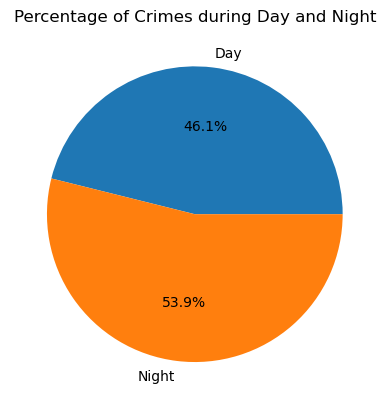

In [22]:
# compare crimes occuring day vs night
# Function to determine if a time value is within the day/night range
def is_day(time):
    time_str = str(time).zfill(4)  # Convert to string and pad with leading zeros
    return (time_str >= '0600') and (time_str <= '1759')

def is_night(time):
    time_str = str(time).zfill(4)  # Convert to string and pad with leading zeros
    return (time_str >= '1800') or (time_str <= '0559')


# Sort the data into "day" and "night" columns
top5_dataframe['day'] = top5_dataframe['TIME OCC'].apply(is_day)
top5_dataframe['night'] = top5_dataframe['TIME OCC'].apply(is_night)



# Calculate the percentage of crimes during the day and night
day_percentage = top5_dataframe[top5_dataframe['day']].shape[0] / top5_dataframe.shape[0] * 100
night_percentage = top5_dataframe[top5_dataframe['night']].shape[0] / top5_dataframe.shape[0] * 100

# Create a pie chart for the percentage of crimes during day
plt.pie([day_percentage, 100 - day_percentage], labels=['Day', 'Night'], autopct='%1.1f%%')
plt.title('Percentage of Crimes during Day and Night')
plt.show()


In [ ]:
# generate sum of each top 5 crime occurance
value_counts = top5_dataframe['Crm Cd Desc'].value_counts()

# Check the count for 'burglary'
stolen_vehicle_count=value_counts.get('VEHICLE - STOLEN', 0)
battery_count=value_counts.get('BATTERY - SIMPLE ASSAULT', 0)
vehicle_burglary_count=value_counts.get('BURGLARY FROM VEHICLE', 0)
vandalism_count=value_counts.get('VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 0)
burglary_count = value_counts.get('BURGLARY', 0)

# Create DataFrame
top5_count_df=pd.DataFrame({
    "Stolen Vehicle": stolen_vehicle_count,
    "Battery - Simple Assault": battery_count,
    "Burglary From Vehicle": vehicle_burglary_count,
    "Vandalism": vandalism_count,
    "Burglary": burglary_count},
    index=['Count'])
top5_count_df

In [23]:

# Group the data by year and calculate the counts for each crime category
grouped_counts = top5_dataframe.groupby('year')['Crm Cd Desc'].value_counts()

# Retrieve the counts for each crime category and year
stolen_vehicle_count = grouped_counts.loc[:, 'VEHICLE - STOLEN'].fillna(0)
battery_count = grouped_counts.loc[:, 'BATTERY - SIMPLE ASSAULT'].fillna(0)
vehicle_burglary_count = grouped_counts.loc[:, 'BURGLARY FROM VEHICLE'].fillna(0)
vandalism_count = grouped_counts.loc[:, 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)'].fillna(0)
burglary_count = grouped_counts.loc[:, 'BURGLARY'].fillna(0)

# Create the DataFrame with counts by year
top5_count_df = pd.DataFrame({
    "Stolen Vehicle": stolen_vehicle_count,
    "Battery - Simple Assault": battery_count,
    "Burglary From Vehicle": vehicle_burglary_count,
    "Vandalism": vandalism_count,
    "Burglary": burglary_count
})

# Print the DataFrame
print(top5_count_df)


      Stolen Vehicle  Battery - Simple Assault  Burglary From Vehicle  \
year                                                                    
2020            1701                      1628                   1509   
2021            1923                      1801                   1976   
2022            1903                      1942                   1860   
2023             550                       584                    475   

      Vandalism  Burglary  
year                       
2020       1406      1414  
2021       1553      1400  
2022       1557      1508  
2023        464       479  


<function matplotlib.pyplot.show(close=None, block=None)>

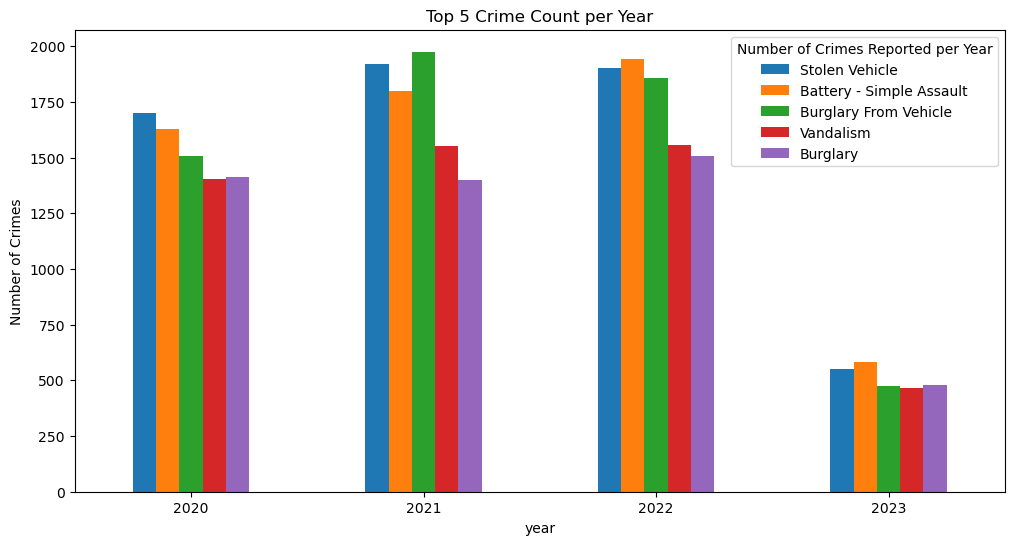

In [30]:
ax = top5_count_df.plot.bar(rot=0, figsize=(12, 6))
ax.set_ylabel("Number of Crimes")
ax.set_title("Top 5 Crime Count per Year")
plt.legend(title="Number of Crimes Reported per Year")

plt.show